In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils
%matplotlib inline

In [3]:
df = utils.wrangle()

# Questions & Answers

___
### Background
FMC, DMC, and DC all take longer term rainfall and temperature averages into account to measure how dry the land is. They consider the past 16 hours, 12 days, and 52 days respectively. FMC and DMC also consider relative humidity. ISI takes FMC and factors in wind speed to determine how easily surface level fuel will catch fire and begin to spread.
___

1 Are there any obivous correlations between input variables?

___
It seems quite clear that FFMC and ISI have some sort of hyperbolic relationship. This makes sense since FFMC is considered along with wind to calculate ISI.

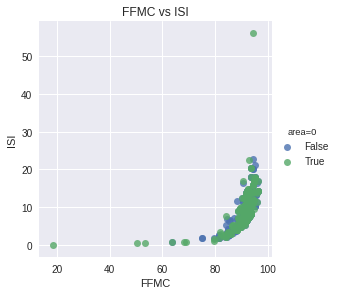

In [6]:
sns.lmplot(data=df, x='FFMC', y='ISI', fit_reg=False, size=4, hue='area=0')
plt.title("FFMC vs ISI")
plt.show()

___
DMC and DC are obviously calculated in a very similar way, and the difference is likely some integer value that represents relative humidity and rainfall over the long term. I say this because of the step nature between the implied lines on the chart.

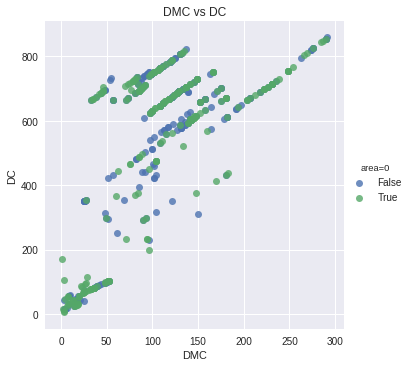

In [5]:
sns.lmplot(data=df, x='DMC', y='DC', fit_reg=False, hue='area=0');
plt.title("DMC vs DC")
plt.show()

___
2 Are there any obvious linear relationships between any one input variable and the output?

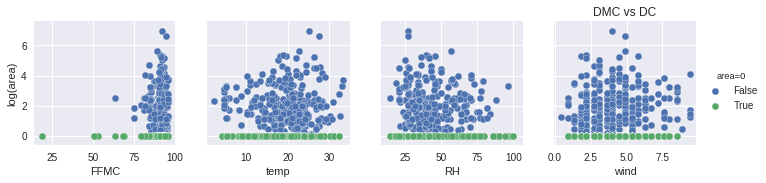

In [9]:
sns.pairplot(data=df,y_vars=['log(area)'], x_vars=['FFMC', 'temp', 'RH','wind'],hue='area=0');
plt.title("DMC vs DC")
plt.show()

It looks perhaps like there are some loose correlations between acreage burned and FFMC, temp, RH, and wind. 
___

3 How are fires distributed throughout the year?

___
There are many more fires in the Summer, but there are also a decent number in the late Winter/early Spring. While there are more larger fires in the Summer, December seems to have the highest average fire size. 

This leads me to wonder if the dryness is distributed in a similar way.

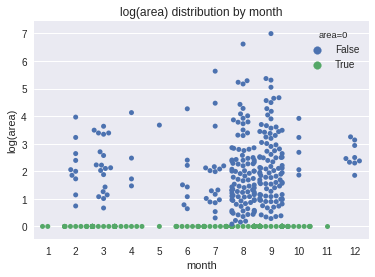

In [17]:
sns.swarmplot(x='month',y='log(area)', data=df,hue='area=0');
plt.title("log(area) distribution by month")
plt.show()

___
The swarmplot showing DC by month strongly resembles the distribution of acreage burned by month.

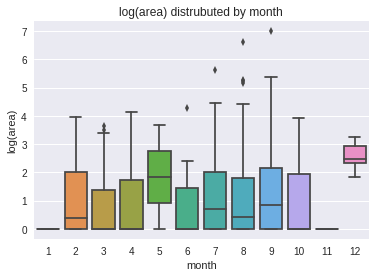

In [14]:
sns.boxplot(x='month',y='log(area)', data=df)
plt.title("log(area) distrubuted by month")
plt.show()

___
4 Are there any strange outliers?

___
Rain and ISI both seem to have some extreme outliers. However, I have no reason to think these data points are unreliable.

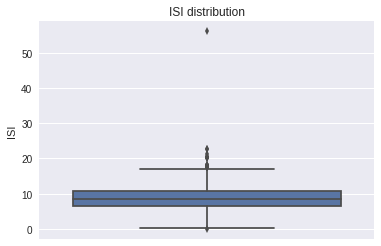

In [15]:
sns.boxplot(y='ISI', data=df);
plt.title("ISI distribution")
plt.show()

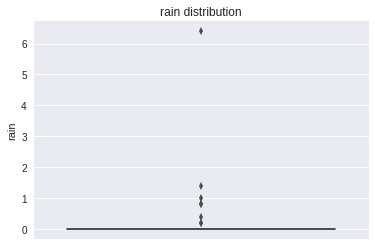

In [16]:
sns.boxplot(y='rain', data=df);
plt.title("rain distribution")
plt.show()